<h1>Housing price prediction</h1>

In [1]:
! pip install numpy
! pip install pandas
! pip install scikit-learn
! pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('data/Housing.csv')

In [4]:
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
target = 'price'

x = dataset[features]

#replaceing yes, no with 1 and 0
items = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for i in items:
    x.loc[:, i] = x[i].replace({'yes':1,'no':0})

#replaceing furnished, semi-furnished, unfurnished with 2, 1 and 0
x.loc[:, 'furnishingstatus'] = x['furnishingstatus'].replace({'furnished': 2, 'semi-furnished': 1, 'unfurnished' : 0})

y = dataset[target]

print(x)
print(y)

     area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    7420         4          2        3        1         0        0   
1    8960         4          4        4        1         0        0   
2    9960         3          2        2        1         0        1   
3    7500         4          2        2        1         0        1   
4    7420         4          1        2        1         1        1   
..    ...       ...        ...      ...      ...       ...      ...   
540  3000         2          1        1        1         0        1   
541  2400         3          1        1        0         0        0   
542  3620         2          1        1        1         0        0   
543  2910         3          1        1        0         0        0   
544  3850         3          1        2        1         0        0   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
0                 0               1        2        1                2  
1

C:\Users\user\AppData\Local\Temp\ipykernel_16728\177810728.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:, i] = x[i].replace({'yes':1,'no':0})
C:\Users\user\AppData\Local\Temp\ipykernel_16728\177810728.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x.loc[:, 'furnishingstatus'] = x['furnishingstatus'].replace({'furnished': 2, 'semi-furnished': 1, 'unfurnished' : 0})


In [5]:
x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=42)

In [19]:
scaler = MinMaxScaler()

x_train_reshape = (x_train - x_train.min()) / (x_train.max() - x_train.min())
y_train_reshape = y_train.values
# y_train_reshape = (y_train - y_train.min()) / (y_train.max() - y_train.min())
x_validate_reshape = (x_validate - x_validate.min()) / (x_validate.max() - x_validate.min())
y_validate_reshape = y_validate.values
# y_validate_reshape = (y_validate - y_validate.min()) / (y_validate.max() - y_validate.min())

display(x_train_reshape)
display(y_train_reshape)
display(x_validate_reshape)
display(y_validate_reshape)

# x_train_reshape = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
# y_train_reshape = y_train.values
# x_validate_reshape = pd.DataFrame(scaler.fit_transform(x_validate), columns=x_validate.columns)
# y_validate_reshape = y_validate.values
# print(x_train_reshape)
# print(y_train_reshape)

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
46,0.298969,0.4,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,1.0
93,0.381443,0.4,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.5
335,0.148866,0.2,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.666667,0.0,1.0
412,0.065979,0.4,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
471,0.14433,0.4,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.298969,0.6,0.333333,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
106,0.261168,0.6,0.333333,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.5
270,0.195876,0.4,0.333333,0.666667,1.0,0.0,0.0,1.0,0.0,0.333333,0.0,1.0
435,0.164261,0.2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


array([ 7525000,  6300000,  3920000,  3430000,  3010000,  4620000,
        1750000,  3010000,  2520000,  3710000,  3703000,  2450000,
        4200000,  3640000,  3640000,  5383000,  1767150,  5250000,
        3500000,  6790000,  3920000,  3920000,  5810000,  5250000,
        5950000,  3500000,  2408000,  2660000,  5285000,  3675000,
        4200000,  2275000,  3570000,  4620000,  4200000,  3087000,
        3255000,  8855000,  3640000,  7343000,  4690000,  4305000,
        3640000,  4403000,  4270000,  2940000,  4795000,  8540000,
        4235000,  7700000,  3500000,  3360000,  4970000,  3150000,
        5530000,  5880000,  3710000,  3640000,  8400000,  6083000,
        4760000,  3080000,  5243000,  7245000,  4550000,  8575000,
        8960000,  3500000,  6930000,  4613000,  4340000,  4473000,
        3780000,  6300000,  5215000,  5040000,  4515000,  8645000,
        2660000,  3118850,  2450000, 10850000,  6020000,  7560000,
        4123000,  4098500,  9100000,  7455000,  4900000,  3423

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
316,0.365217,0.666667,0.5,0.333333,0.0,0.0,1.0,0.0,0.0,0.333333,0.0,0.0
77,0.417391,0.333333,0.5,0.666667,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0
360,0.203478,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
90,0.286957,0.333333,0.0,0.333333,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.5
493,0.196522,0.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
15,0.373913,0.666667,0.0,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.5
357,0.454783,0.666667,0.0,0.333333,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,1.0
39,0.373913,0.666667,0.5,1.0,1.0,0.0,0.0,0.0,1.0,0.333333,0.0,0.5
54,0.373913,0.333333,0.5,0.333333,1.0,1.0,0.0,0.0,1.0,0.333333,0.0,0.5


array([ 4060000,  6650000,  3710000,  6440000,  2800000,  4900000,
        5250000,  4543000,  2450000,  3353000, 10150000,  2660000,
        3360000,  3360000,  2275000,  2660000,  2660000,  7350000,
        2940000,  2870000,  6720000,  5425000,  1890000,  5250000,
        4193000, 12250000,  3080000,  5110000,  9800000,  2520000,
        6790000,  3500000,  6650000,  2940000,  3325000,  4200000,
        4900000,  3290000,  3500000,  2380000,  5495000,  3675000,
        6650000,  4907000,  3150000,  4480000,  6580000,  5740000,
        3003000,  1820000,  8400000,  2450000,  4270000,  4007500,
        3234000,  1750000,  9800000,  2100000,  4340000,  3045000,
        3850000,  3500000,  4753000,  3080000,  4550000,  6510000,
        6685000,  5110000,  4550000,  6650000,  3640000,  5600000,
        3780000,  6615000,  3220000,  6650000,  4690000,  4830000,
        6860000,  2233000,  7035000,  4165000,  6195000,  6510000,
        1890000,  8190000,  2660000,  4193000, 13300000,  9681

Text(0, 0.5, 'price')

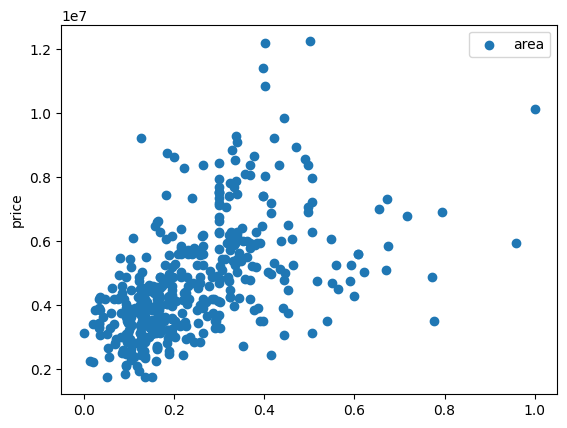

In [36]:
plt.scatter(x_train_reshape['area'], y_train_reshape)
plt.legend(x_train_reshape.columns)
plt.ylabel('price')

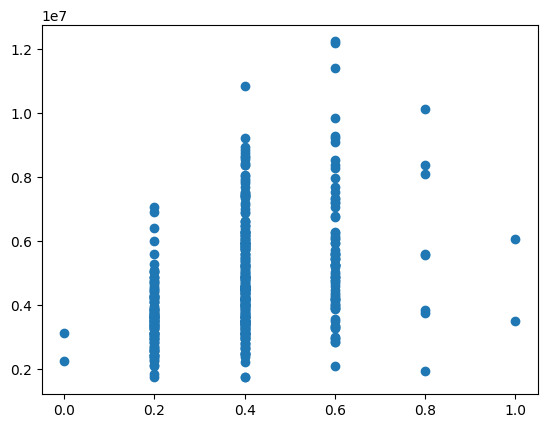

In [27]:
plt.scatter(x_train_reshape['bedrooms'],y_train_reshape)

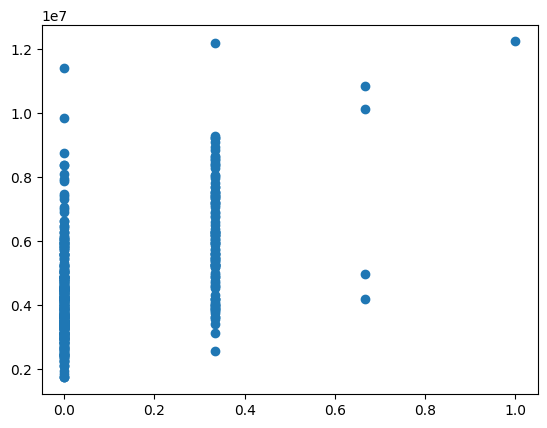

In [28]:
plt.scatter(x_train_reshape['bathrooms'],y_train_reshape)

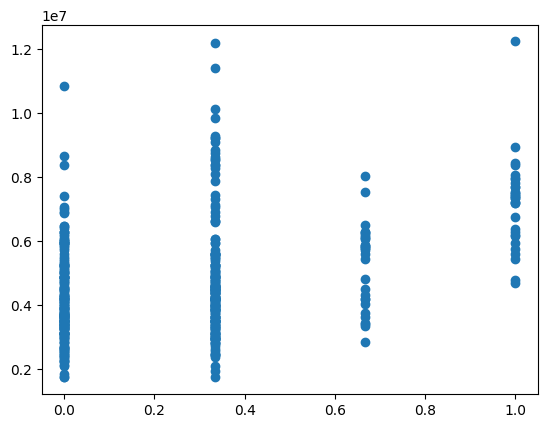

In [29]:
plt.scatter(x_train_reshape['stories'],y_train_reshape)

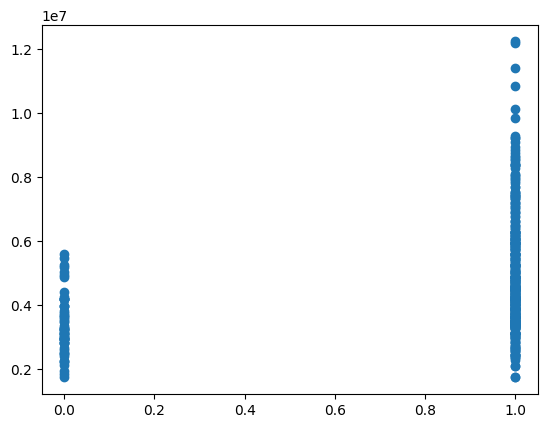

In [30]:
plt.scatter(x_train_reshape['mainroad'],y_train_reshape)

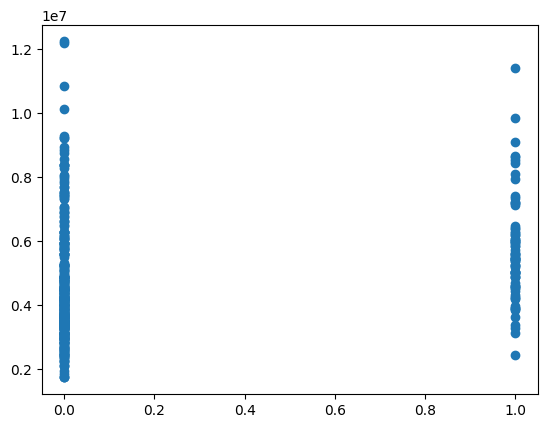

In [31]:
plt.scatter(x_train_reshape['guestroom'],y_train_reshape)

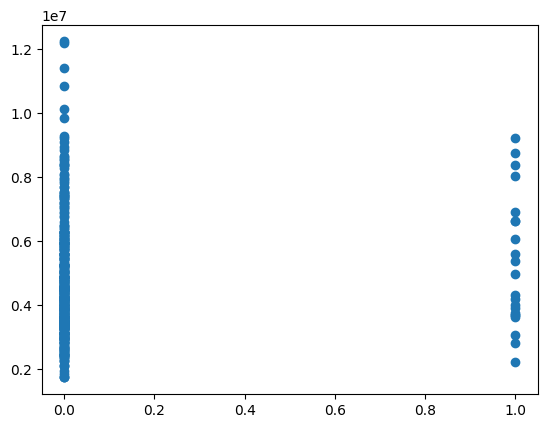

In [32]:
plt.scatter(x_train_reshape['hotwaterheating'],y_train_reshape)

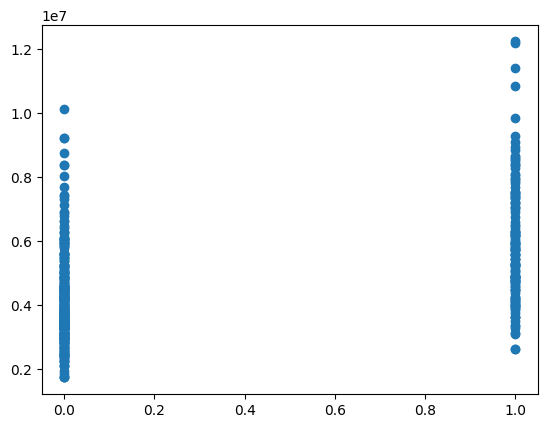

In [33]:
plt.scatter(x_train_reshape['airconditioning'],y_train_reshape)

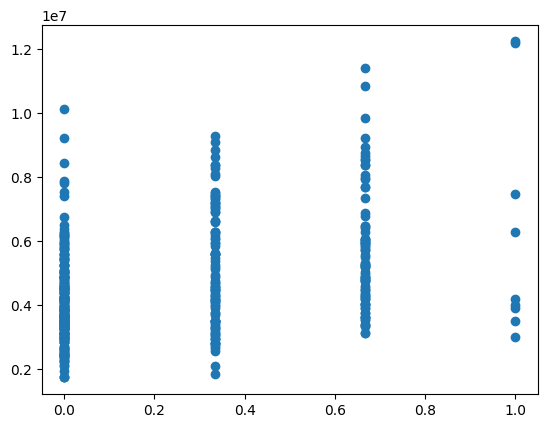

In [34]:
plt.scatter(x_train_reshape['parking'],y_train_reshape)

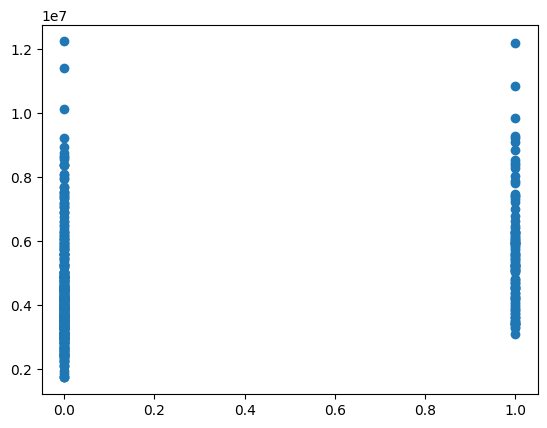

In [35]:
plt.scatter(x_train_reshape['prefarea'],y_train_reshape)

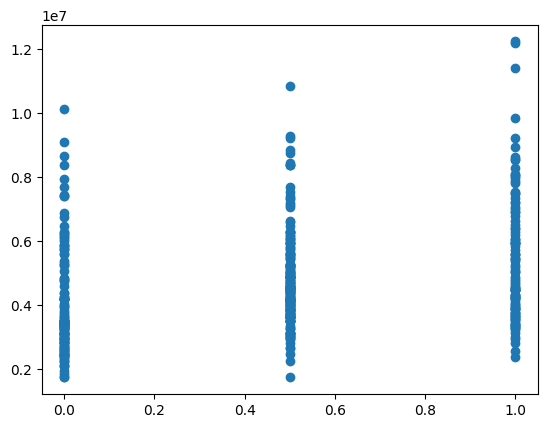

In [37]:
plt.scatter(x_train_reshape['furnishingstatus'],y_train_reshape)

In [7]:
print(x_train_reshape.shape)
print(y_train_reshape.shape)
print(x_validate_reshape.shape)
print(y_validate_reshape.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [8]:
model = LinearRegression()

model.fit(x_train_reshape, y_train_reshape)

LinearRegression()

[np.float64(6029364.424762004),
 np.float64(8067824.458957506),
 np.float64(3118831.464335316),
 np.float64(4728026.664479047),
 np.float64(3436314.0724968105),
 np.float64(3839103.747037856),
 np.float64(6034081.532840369),
 np.float64(7182730.795510233),
 np.float64(2761793.4590468146),
 np.float64(2693505.9206963414),
 np.float64(11112468.852626963),
 np.float64(2876803.9494786435),
 np.float64(3231672.7432757886),
 np.float64(3401851.7327271514),
 np.float64(3817886.7788202595),
 np.float64(6480945.382725763),
 np.float64(2916318.694518604),
 np.float64(5041786.027967887),
 np.float64(4604635.232230678),
 np.float64(3703695.401192182),
 np.float64(5965945.535334849),
 np.float64(6122591.646420471),
 np.float64(2791759.9586601704),
 np.float64(4855963.7247457),
 np.float64(5576482.136673791),
 np.float64(8542790.292139078),
 np.float64(3251260.921021237),
 np.float64(5828055.7114612665),
 np.float64(8859877.98610466),
 np.float64(3425115.780574275),
 np.float64(7098364.035488617),
 

[4060000,
 6650000,
 3710000,
 6440000,
 2800000,
 4900000,
 5250000,
 4543000,
 2450000,
 3353000,
 10150000,
 2660000,
 3360000,
 3360000,
 2275000,
 2660000,
 2660000,
 7350000,
 2940000,
 2870000,
 6720000,
 5425000,
 1890000,
 5250000,
 4193000,
 12250000,
 3080000,
 5110000,
 9800000,
 2520000,
 6790000,
 3500000,
 6650000,
 2940000,
 3325000,
 4200000,
 4900000,
 3290000,
 3500000,
 2380000,
 5495000,
 3675000,
 6650000,
 4907000,
 3150000,
 4480000,
 6580000,
 5740000,
 3003000,
 1820000,
 8400000,
 2450000,
 4270000,
 4007500,
 3234000,
 1750000,
 9800000,
 2100000,
 4340000,
 3045000,
 3850000,
 3500000,
 4753000,
 3080000,
 4550000,
 6510000,
 6685000,
 5110000,
 4550000,
 6650000,
 3640000,
 5600000,
 3780000,
 6615000,
 3220000,
 6650000,
 4690000,
 4830000,
 6860000,
 2233000,
 7035000,
 4165000,
 6195000,
 6510000,
 1890000,
 8190000,
 2660000,
 4193000,
 13300000,
 9681000,
 4340000,
 8645000,
 3703000,
 5145000,
 6440000,
 5950000,
 5810000,
 5740000,
 6230000,
 560000

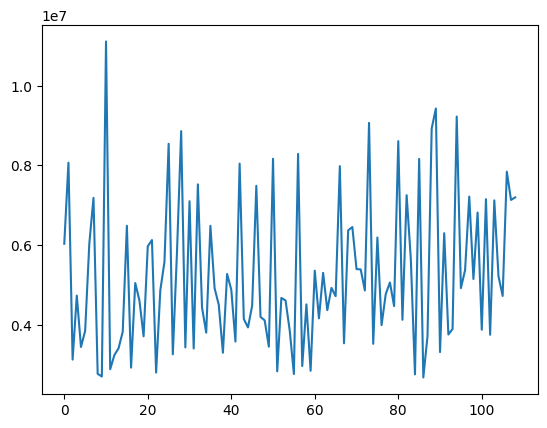

In [25]:
y_prediction = model.predict(x_validate_reshape)

plt.plot(y_prediction)

display(list(y_prediction), y_validate_reshape.tolist())

In [10]:
print(mean_squared_error(y_validate, y_prediction))
print(r2_score(y_validate, y_prediction))

1903749221373.327
0.6233608143552078
